In [1]:
import sys
sys.path.append('C:\\projects\\UTNCE\\src\\utnce')

In [2]:
from simplify import *
from prepare import *
from routing import *
from percolation_plot import *
from generate import *
from transfer import *

In [3]:
osm_path = "C:\\projects\\UTNCE\\data\\Amsterdam.large.pbf"

# Subway-Amsterdam

## Generate subway networks

In [4]:
sub_stations, edges, nodes, sub_routes, check_name = prepare_metro(osm_path)

topology: 100%|████████████████████████████████████████████████████████████████████| 962/962 [00:00<00:00, 8062.15it/s]


In [5]:
edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
0,23157994,"LINESTRING (4.9236699 52.3361909, 4.9236979 52...",subway,None,0,0,1,258.660599,0.010346,258,"(0, 1)","(1, 0)"
1,23158053,"LINESTRING (4.9642294 52.2945339, 4.9644259 52...",subway,None,1,2,3,215.433271,0.008617,215,"(2, 3)","(3, 2)"
2,23158054,"LINESTRING (4.9622901 52.2955678, 4.9624673 52...",subway,None,2,4,5,121.794737,0.004872,121,"(4, 5)","(5, 4)"
3,23189033,"LINESTRING (4.8467318 52.3952137, 4.8471439 52...",subway,None,3,6,7,28.046592,0.001122,28,"(6, 7)","(7, 6)"
4,23189039,"LINESTRING (4.8409161 52.3937679, 4.8416087 52...",subway,None,4,8,492,382.935219,0.015317,382,"(8, 492)","(492, 8)"
...,...,...,...,...,...,...,...,...,...,...,...,...
957,1131538381,"LINESTRING (4.9200955 52.3417374, 4.9200444 52...",subway,None,957,803,463,73.656989,0.002946,73,"(803, 463)","(463, 803)"
958,1131538382,"LINESTRING (4.9201445 52.3416568, 4.9200955 52...",subway,None,958,462,803,9.568427,0.000383,9,"(462, 803)","(803, 462)"
959,1131538383,"LINESTRING (4.9200365 52.3417239, 4.9200773 52...",subway,None,959,804,246,9.568874,0.000383,9,"(804, 246)","(246, 804)"
960,1131538384,"LINESTRING (4.9197172 52.3423576, 4.9197589 52...",subway,None,960,463,804,73.789113,0.002952,73,"(463, 804)","(804, 463)"


In [6]:
nodes

,geometry,degree,id
0,POINT (4.9236699 52.3361909),2,0
1,POINT (4.9232197 52.3339159),2,1
2,POINT (4.9642294 52.2945339),2,2
3,POINT (4.9673168 52.2943931),2,3
4,POINT (4.9622901 52.2955678),2,4
...,...,...,...
863,POINT (4.8906476 52.3539585),2,863
864,POINT (4.8906487 52.3539577),2,864
865,POINT (4.8927726 52.3704434),2,865
866,POINT (4.9010846 52.371353),2,866


In [7]:
replacement_dict = {
     'Amsterdam Centraal': 'Centraal Station',
}


sub_routes, check_name = recheck_metro_routes(replacement_dict, sub_stations, sub_routes)

In [8]:
sub_routes

,osm_id,route,to,name,ref,network,service,geometry
0,18683,subway,Isolatorweg,Metro 50: Gein => Isolatorweg,50,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.98996 52.29640, 4.98959 52..."
1,4515354,subway,Gein,Metro 50: Isolatorweg => Gein,50,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.83880 52.38842, 4.83897 52..."
2,31249,subway,Isolatorweg,Metro 51: Centraal Station => Isolatorweg,51,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.90193 52.37689, 4.90202 52..."
3,4515355,subway,Centraal Station,Metro 51: Isolatorweg => Centraal Station,51,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.83880 52.38842, 4.83897 52..."
4,8466667,subway,Zuid,Metro 52: Noord => Zuid,52,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.93265 52.40228, 4.93269 52..."
5,8466671,subway,Noord,Metro 52: Zuid => Noord,52,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.87423 52.33922, 4.87552 52..."
6,18532,subway,Gaasperplas,Metro 53: Centraal Station => Gaasperplas,53,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.90193 52.37689, 4.90202 52..."
7,4515356,subway,Centraal Station,Metro 53: Gaasperplas => Centraal Station,53,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.98373 52.31201, 4.98364 52..."
8,18423,subway,Gein,Metro 54: Centraal Station => Gein,54,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.90193 52.37689, 4.90202 52..."
9,4515357,subway,Centraal Station,Metro 54: Gein => Centraal Station,54,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.98996 52.29640, 4.98959 52..."


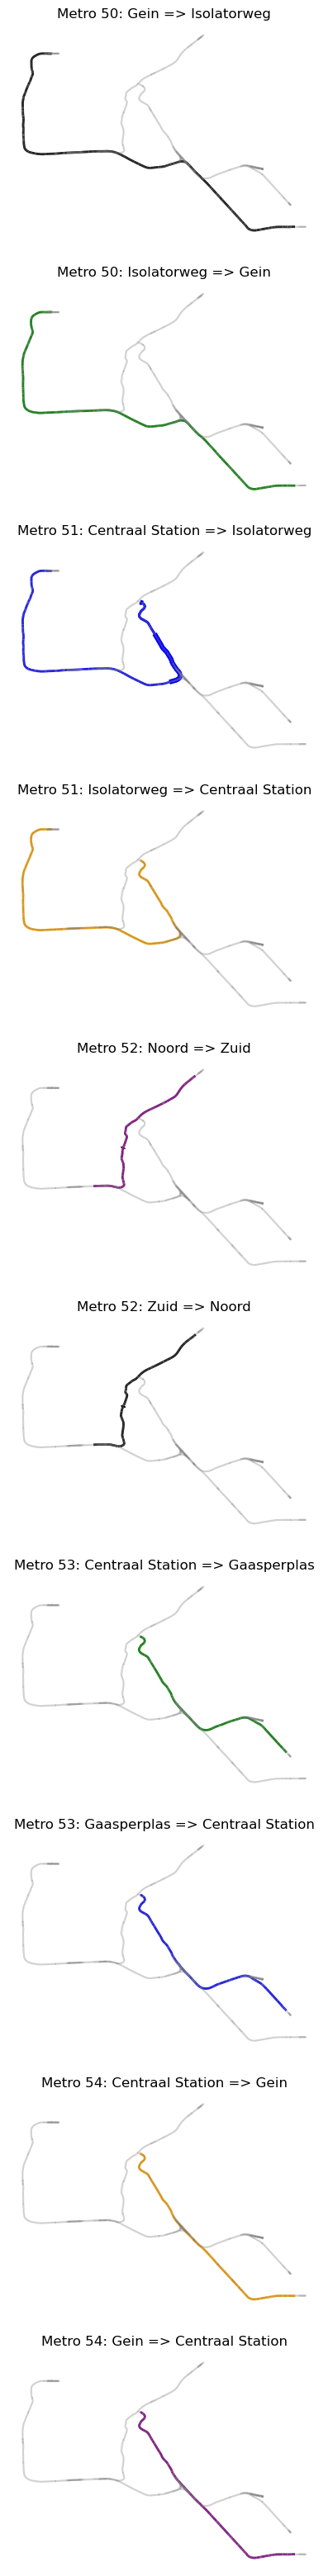

In [9]:
sub_order_route_dict, sub_shortest_path_pairs, sub_shortest_path_edges, sub_edges = metro(sub_stations, edges, nodes, sub_routes, city='Amsterdam')

In [10]:
sub_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
0,23157994,"LINESTRING (4.9236699 52.3361909, 4.9236979 52...",subway,None,0,0,1,258.660599,0.010346,258,"(0, 1)","(1, 0)"
1,23158053,"LINESTRING (4.9642294 52.2945339, 4.9644259 52...",subway,None,1,2,3,215.433271,0.008617,215,"(2, 3)","(3, 2)"
2,23158054,"LINESTRING (4.9622901 52.2955678, 4.9624673 52...",subway,None,2,4,5,121.794737,0.004872,121,"(4, 5)","(5, 4)"
3,23189033,"LINESTRING (4.8467318 52.3952137, 4.8471439 52...",subway,None,3,6,7,28.046592,0.001122,28,"(6, 7)","(7, 6)"
4,23189039,"LINESTRING (4.8409161 52.3937679, 4.8416087 52...",subway,None,4,8,492,382.935219,0.015317,382,"(8, 492)","(492, 8)"
...,...,...,...,...,...,...,...,...,...,...,...,...
957,1131538381,"LINESTRING (4.9200955 52.3417374, 4.9200444 52...",subway,None,957,803,463,73.656989,0.002946,73,"(803, 463)","(463, 803)"
958,1131538382,"LINESTRING (4.9201445 52.3416568, 4.9200955 52...",subway,None,958,462,803,9.568427,0.000383,9,"(462, 803)","(803, 462)"
959,1131538383,"LINESTRING (4.9200365 52.3417239, 4.9200773 52...",subway,None,959,804,246,9.568874,0.000383,9,"(804, 246)","(246, 804)"
960,1131538384,"LINESTRING (4.9197172 52.3423576, 4.9197589 52...",subway,None,960,463,804,73.789113,0.002952,73,"(463, 804)","(804, 463)"


In [11]:
sub_shortest_path_edges

{'Metro 50: Gein => Isolatorweg':         osm_id                                           geometry railway  \
 0     26419538  LINESTRING (4.850446 52.3951026, 4.8505958 52....  subway   
 1    166370272  LINESTRING (4.8392661 52.3921517, 4.839366 52....  subway   
 2    166370272  LINESTRING (4.8465456 52.3951777, 4.8467329 52...  subway   
 3    166370274  LINESTRING (4.8471465 52.3951789, 4.8471814 52...  subway   
 4    166370274  LINESTRING (4.8471814 52.3951787, 4.8473044 52...  subway   
 ..         ...                                                ...     ...   
 165  181908692  LINESTRING (4.9762604 52.296007, 4.9765098 52....  subway   
 166  181908696  LINESTRING (4.9765098 52.2960472, 4.9769403 52...  subway   
 167  181909254  LINESTRING (4.9756246 52.2959031, 4.9762604 52...  subway   
 168  397809138  LINESTRING (4.9838859 52.2963361, 4.9844451 52...  subway   
 169  397809159  LINESTRING (4.9871059 52.2963808, 4.985907 52....  subway   
 
        service   id  from_id

## Add columns to nodes

In [12]:
sub_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(sub_order_route_dict, sub_routes)

In [13]:
sub_order_route_dict

{'Metro 50: Gein => Isolatorweg':     id                 name                      geometry     geo_x  \
 0   21          Isolatorweg  POINT (4.8505958 52.3951031)  4.850596   
 1    0   Station Sloterdijk  POINT (4.8389786 52.3890375)  4.838979   
 2   13         De Vlugtlaan   POINT (4.838233 52.3794484)  4.838233   
 3   14  Jan van Galenstraat  POINT (4.8353639 52.3725816)  4.835364   
 4   15           Postjesweg  POINT (4.8340343 52.3645962)  4.834034   
 5   12             Lelylaan  POINT (4.8344667 52.3580615)  4.834467   
 6    2      Heemstedestraat   POINT (4.834401 52.3523291)  4.834401   
 7   11    Henk Sneevlietweg  POINT (4.8345741 52.3463868)  4.834574   
 8    8      Amstelveenseweg  POINT (4.8575709 52.3384751)  4.857571   
 9   10                 Zuid  POINT (4.8739633 52.3393223)  4.873963   
 10  19          Station RAI    POINT (4.889539 52.337689)  4.889539   
 11   9           Overamstel  POINT (4.9176063 52.3317688)  4.917606   
 12   7      Van der Madeweg  P

In [14]:
sub_new_nodes = add_columns_to_nodes(sub_order_route_dict, nodes)

In [15]:
sub_new_nodes

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,POINT (4.85060 52.39510),2,805,Isolatorweg,4.850596,52.395103,"(4.8505958, 52.3951031)",Metro 50: Gein => Isolatorweg,subway,"50, 51","50, 51"
1,POINT (4.83898 52.38904),2,121,Station Sloterdijk,4.838979,52.389038,"(4.8389786, 52.3890375)",Metro 50: Gein => Isolatorweg,subway,"50, 51","50, 51"
2,POINT (4.83823 52.37945),2,844,De Vlugtlaan,4.838233,52.379448,"(4.838233, 52.3794484)",Metro 50: Gein => Isolatorweg,subway,"50, 51","50, 51"
3,POINT (4.83536 52.37258),2,846,Jan van Galenstraat,4.835364,52.372582,"(4.8353639, 52.3725816)",Metro 50: Gein => Isolatorweg,subway,"50, 51","50, 51"
4,POINT (4.83403 52.36460),2,848,Postjesweg,4.834034,52.364596,"(4.8340343, 52.3645962)",Metro 50: Gein => Isolatorweg,subway,"50, 51","50, 51"
...,...,...,...,...,...,...,...,...,...,...,...
81,POINT (4.95669 52.33041),2,823,Station Diemen Zuid,4.956688,52.330406,"(4.9566878, 52.3304057)",Metro 53: Gaasperplas => Centraal Station,subway,53,None
82,POINT (4.96734 52.32837),2,824,Verrijn Stuartweg,4.967335,52.328367,"(4.9673352, 52.3283668)",Metro 53: Gaasperplas => Centraal Station,subway,53,None
83,POINT (4.97309 52.32372),2,301,Ganzenhoef,4.973086,52.323724,"(4.9730859, 52.3237237)",Metro 53: Gaasperplas => Centraal Station,subway,53,None
84,POINT (4.97919 52.31704),2,821,Kraaiennest,4.979187,52.317039,"(4.9791866, 52.3170385)",Metro 53: Gaasperplas => Centraal Station,subway,53,None


In [16]:
# sub_new_nodes.to_excel('./sub_new_nodes911_0.xlsx',header = True, index = False)

### retrive all transfer stations on each route

In [17]:
sub_transfer_stations_df = all_transfer_stations_df(sub_new_nodes)

In [18]:
len(sub_transfer_stations_df)

27

## Add columns to edges

In [19]:
sub_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(sub_shortest_path_edges, sub_routes)

In [20]:
sub_shortest_path_edges

{'Metro 50: Gein => Isolatorweg':         osm_id                                           geometry railway  \
 0     26419538  LINESTRING (4.850446 52.3951026, 4.8505958 52....  subway   
 1    166370272  LINESTRING (4.8392661 52.3921517, 4.839366 52....  subway   
 2    166370272  LINESTRING (4.8465456 52.3951777, 4.8467329 52...  subway   
 3    166370274  LINESTRING (4.8471465 52.3951789, 4.8471814 52...  subway   
 4    166370274  LINESTRING (4.8471814 52.3951787, 4.8473044 52...  subway   
 ..         ...                                                ...     ...   
 165  181908692  LINESTRING (4.9762604 52.296007, 4.9765098 52....  subway   
 166  181908696  LINESTRING (4.9765098 52.2960472, 4.9769403 52...  subway   
 167  181909254  LINESTRING (4.9756246 52.2959031, 4.9762604 52...  subway   
 168  397809138  LINESTRING (4.9838859 52.2963361, 4.9844451 52...  subway   
 169  397809159  LINESTRING (4.9871059 52.2963808, 4.985907 52....  subway   
 
        service   id  from_id

In [21]:
sub_new_edges = add_columns_to_edges(sub_shortest_path_edges,edges)

In [22]:
sub_new_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,route,ref
0,23157994,"LINESTRING (4.9236699 52.3361909, 4.9236979 52...",subway,None,0,0,1,258.660599,0.010346,258,"(0, 1)","(1, 0)",1.0,Metro 51: Isolatorweg => Centraal Station,subway,51
1,23158053,"LINESTRING (4.9642294 52.2945339, 4.9644259 52...",subway,None,1,2,3,215.433271,0.008617,215,"(2, 3)","(3, 2)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 54"
2,23158054,"LINESTRING (4.9622901 52.2955678, 4.9624673 52...",subway,None,2,4,5,121.794737,0.004872,121,"(4, 5)","(5, 4)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 54"
3,23189033,"LINESTRING (4.8467318 52.3952137, 4.8471439 52...",subway,None,3,6,7,28.046592,0.001122,28,"(6, 7)","(7, 6)",NaN,NaN,NaN,NaN
4,23189039,"LINESTRING (4.8409161 52.3937679, 4.8416087 52...",subway,None,4,8,492,382.935219,0.015317,382,"(8, 492)","(492, 8)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,1131538381,"LINESTRING (4.9200955 52.3417374, 4.9200444 52...",subway,None,957,803,463,73.656989,0.002946,73,"(803, 463)","(463, 803)",1.0,Metro 53: Gaasperplas => Centraal Station,subway,"53, 54"
958,1131538382,"LINESTRING (4.9201445 52.3416568, 4.9200955 52...",subway,None,958,462,803,9.568427,0.000383,9,"(462, 803)","(803, 462)",1.0,Metro 53: Gaasperplas => Centraal Station,subway,"53, 54"
959,1131538383,"LINESTRING (4.9200365 52.3417239, 4.9200773 52...",subway,None,959,804,246,9.568874,0.000383,9,"(804, 246)","(246, 804)",1.0,Metro 51: Isolatorweg => Centraal Station,subway,51
960,1131538384,"LINESTRING (4.9197172 52.3423576, 4.9197589 52...",subway,None,960,463,804,73.789113,0.002952,73,"(463, 804)","(804, 463)",1.0,Metro 51: Isolatorweg => Centraal Station,subway,51


In [23]:
# sub_new_edges.to_excel('./sub_new_edges911_0.xlsx',header = True, index = False)

## Test 1: Amsterdam 1 -- s-no transfer, e-transfer, s_e has one same route

### Change coordinates dictionary of s_e points into two Dataframes of s_e nodes

In [24]:
s_e_coordinates_t3 = {
    's_coordinates_x': 4.9928801197905575, 
    's_coordinates_y': 52.3072242132468, 
    'e_coordinates_x': 4.905626404274936, 
    'e_coordinates_y': 52.37201190163594
} 

In [25]:
start_node, end_node = s_e_node_df(s_e_coordinates_t3, sub_new_nodes)

In [26]:
start_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
70,POINT (4.98434 52.31116),2,61,Gaasperplas,4.984339,52.311161,"(4.9843391, 52.3111615)",Metro 53: Centraal Station => Gaasperplas,subway,53,None


In [27]:
end_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
49,POINT (4.90108 52.37135),2,866,Nieuwmarkt,4.901085,52.371353,"(4.9010846, 52.371353)",Metro 51: Isolatorweg => Centraal Station,subway,"51, 53, 54","51, 53, 54"


### Find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [28]:
s_on_route_ref,e_on_route_ref = s_e_on_route_ref(start_node, end_node)

### Make judgement of s_e_on_route_ref

In [29]:
s_on_route_ref, e_on_route_ref = judge_on_route(s_on_route_ref, e_on_route_ref)

One of e_on_route is the same as s_on_route 

The next step is to find the same route----using function 's_e_same_routes'


### Find those same routes

In [30]:
s_e_same_routes_df = s_e_same_routes(s_on_route_ref,e_on_route_ref)
s_e_same_routes_df

s_node and e_node are on same route/routes:  ref
0  53



,ref
0,53


### Get all stations between s_e nodes and transfer nodes

In [31]:
all_stations_on_matched_routes_dfs = all_stations_on_matched_routes(s_e_same_routes_df,sub_routes,start_node,end_node,sub_order_route_dict)
all_stations_on_matched_routes_dfs

[    id                 name                      geometry     geo_x  \
 0   15     Centraal Station  POINT (4.9010471 52.3775081)  4.901047   
 1   11           Nieuwmarkt   POINT (4.9010846 52.371353)  4.901085   
 2   12        Waterlooplein  POINT (4.9037527 52.3666905)  4.903753   
 3   13         Weesperplein  POINT (4.9079182 52.3613263)  4.907918   
 4    0         Wibautstraat  POINT (4.9120486 52.3545947)  4.912049   
 5    4        Amstelstation  POINT (4.9174767 52.3466483)  4.917477   
 6   10           Spaklerweg  POINT (4.9210454 52.3402871)  4.921045   
 7    8      Van der Madeweg  POINT (4.9302846 52.3297352)  4.930285   
 8    9         Venserpolder  POINT (4.9462773 52.3268326)  4.946277   
 9    6  Station Diemen Zuid  POINT (4.9566878 52.3304057)  4.956688   
 10   7    Verrijn Stuartweg  POINT (4.9673352 52.3283668)  4.967335   
 11   2           Ganzenhoef  POINT (4.9730859 52.3237237)  4.973086   
 12   5          Kraaiennest  POINT (4.9791866 52.3170385)  4.97

In [32]:
btw_stations_each_way_list = btw_stations_each_way_list(start_node,end_node,all_stations_on_matched_routes_dfs)
btw_stations_each_way_list

[    id                 name                      geometry     geo_x  \
 13   3          Gaasperplas  POINT (4.9842364 52.3115025)  4.984236   
 12   5          Kraaiennest  POINT (4.9791866 52.3170385)  4.979187   
 11   2           Ganzenhoef  POINT (4.9730859 52.3237237)  4.973086   
 10   7    Verrijn Stuartweg  POINT (4.9673352 52.3283668)  4.967335   
 9    6  Station Diemen Zuid  POINT (4.9566878 52.3304057)  4.956688   
 8    9         Venserpolder  POINT (4.9462773 52.3268326)  4.946277   
 7    8      Van der Madeweg  POINT (4.9302846 52.3297352)  4.930285   
 6   10           Spaklerweg  POINT (4.9210454 52.3402871)  4.921045   
 5    4        Amstelstation  POINT (4.9174767 52.3466483)  4.917477   
 4    0         Wibautstraat  POINT (4.9120486 52.3545947)  4.912049   
 3   13         Weesperplein  POINT (4.9079182 52.3613263)  4.907918   
 2   12        Waterlooplein  POINT (4.9037527 52.3666905)  4.903753   
 1   11           Nieuwmarkt   POINT (4.9010846 52.371353)  4.90

### Get all nodes and id_pairs of nodes between s_e nodes

In [33]:
btw_all_id_pairs_list = btw_all_ids_pairs(btw_stations_each_way_list,sub_new_nodes)
btw_all_id_pairs_list

[   s_id e_id
 0   866  137
 1   137  138
 2   138  139
 3   139  820
 4   820  833
 5   833  827
 6   827  829
 7   829  823
 8   823  824
 9   824  301
 10  301  821
 11  821  331]

### Calculate shortest path and plot

In [34]:
btw_all_id_pairs_list_unique = drop_df_in_list(btw_all_id_pairs_list)

All dataframes in the list are the same


In [35]:
btw_all_id_pairs_list_unique

[   s_id e_id
 0   866  137
 1   137  138
 2   138  139
 3   139  820
 4   820  833
 5   833  827
 6   827  829
 7   829  823
 8   823  824
 9   824  301
 10  301  821
 11  821  331]

In [36]:
G = create_ground_graph(edges, nodes)

In [37]:
shortest_path_pairs_way = all_shortest_paths(G, btw_all_id_pairs_list_unique[0], edges)

In [38]:
shortest_path_pairs_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
833,562757374,"LINESTRING (4.9010846 52.371353, 4.9010385 52....",subway,None,833,866,137,609.918310,0.024397,609,"(866, 137)","(137, 866)"
148,39271189,"LINESTRING (4.9037527 52.3666905, 4.9038624 52...",subway,None,148,137,678,551.595065,0.022064,551,"(137, 678)","(678, 137)"
149,39271189,"LINESTRING (4.907289 52.3623187, 4.9073266 52....",subway,None,149,678,138,118.432627,0.004737,118,"(678, 138)","(138, 678)"
150,39271191,"LINESTRING (4.9079182 52.3613263, 4.9079709 52...",subway,None,150,138,651,204.059056,0.008162,204,"(138, 651)","(651, 138)"
151,39271191,"LINESTRING (4.9089751 52.3596101, 4.9090047 52...",subway,None,151,651,656,13.408083,0.000536,13,"(651, 656)","(656, 651)"
...,...,...,...,...,...,...,...,...,...,...,...,...
350,166161658,"LINESTRING (4.9820664 52.3137766, 4.9818561 52...",subway,None,350,306,300,180.459168,0.007218,180,"(306, 300)","(300, 306)"
369,166187919,"LINESTRING (4.9842364 52.3115025, 4.9837468 52...",subway,None,369,331,332,66.129893,0.002645,66,"(331, 332)","(332, 331)"
570,377776718,"LINESTRING (4.9837468 52.3120156, 4.9836026 52...",subway,None,570,332,476,28.693135,0.001148,28,"(332, 476)","(476, 332)"
571,377776718,"LINESTRING (4.9835318 52.3122373, 4.9830818 52...",subway,None,571,476,482,59.546511,0.002382,59,"(476, 482)","(482, 476)"


In [39]:
duplicate_row_count_way, shortest_path_edges_way, edges_way = edges_with_count_weight(shortest_path_pairs_way, edges)

In [40]:
shortest_path_edges_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,562757374,"LINESTRING (4.9010846 52.371353, 4.9010385 52....",subway,None,833,866,137,609.918310,0.024397,609,"(866, 137)","(137, 866)",1.0
1,39271189,"LINESTRING (4.9037527 52.3666905, 4.9038624 52...",subway,None,148,137,678,551.595065,0.022064,551,"(137, 678)","(678, 137)",1.0
2,39271189,"LINESTRING (4.907289 52.3623187, 4.9073266 52....",subway,None,149,678,138,118.432627,0.004737,118,"(678, 138)","(138, 678)",1.0
3,39271191,"LINESTRING (4.9079182 52.3613263, 4.9079709 52...",subway,None,150,138,651,204.059056,0.008162,204,"(138, 651)","(651, 138)",1.0
4,39271191,"LINESTRING (4.9089751 52.3596101, 4.9090047 52...",subway,None,151,651,656,13.408083,0.000536,13,"(651, 656)","(656, 651)",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,166161658,"LINESTRING (4.9820664 52.3137766, 4.9818561 52...",subway,None,350,306,300,180.459168,0.007218,180,"(306, 300)","(300, 306)",1.0
79,166187919,"LINESTRING (4.9842364 52.3115025, 4.9837468 52...",subway,None,369,331,332,66.129893,0.002645,66,"(331, 332)","(332, 331)",1.0
80,377776718,"LINESTRING (4.9837468 52.3120156, 4.9836026 52...",subway,None,570,332,476,28.693135,0.001148,28,"(332, 476)","(476, 332)",1.0
81,377776718,"LINESTRING (4.9835318 52.3122373, 4.9830818 52...",subway,None,571,476,482,59.546511,0.002382,59,"(476, 482)","(482, 476)",1.0


In [41]:
shortest_path_edges_way.time.sum()

0.4214642141330729

<Axes: >

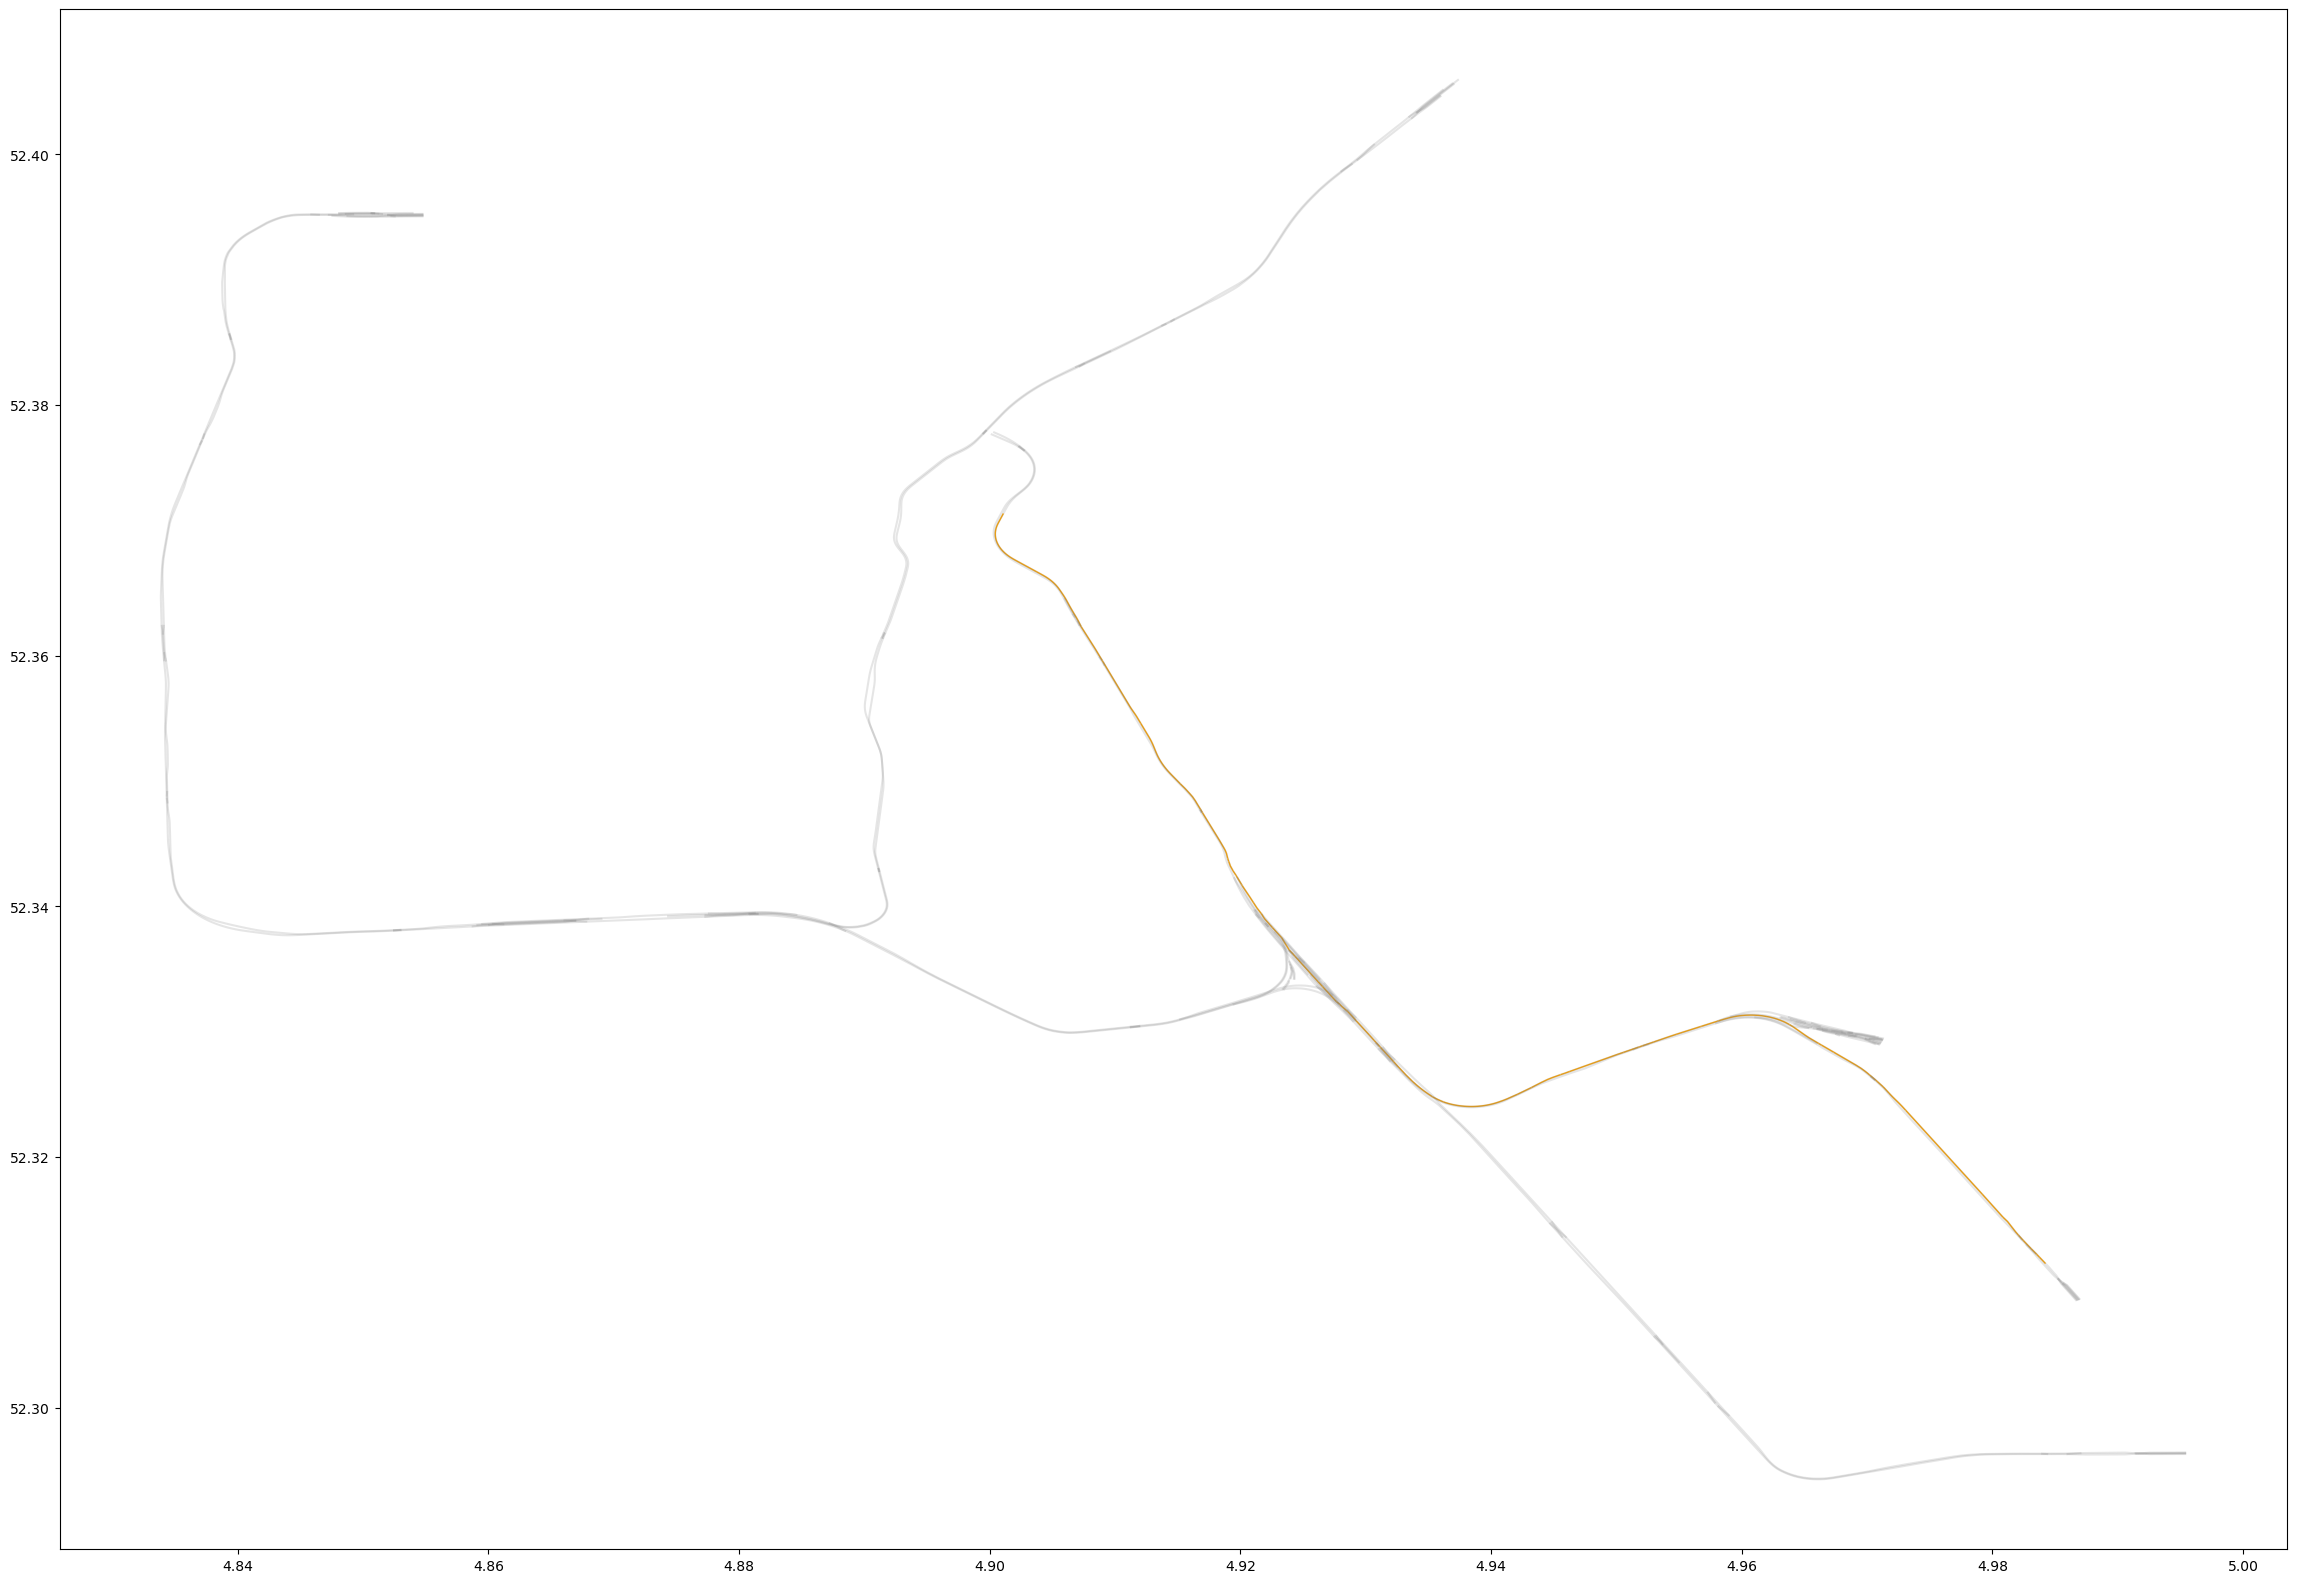

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(sub_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)

gpd.GeoDataFrame(shortest_path_edges_way.copy()).plot(ax=ax, zorder=1, linewidth=(shortest_path_edges_way.count_weight), color='orange')